****
Погодные условия являются значимым фактором при выращивании сои, поэтому их необходимо тщательно учитывать на всех этапах. 

Для анализа мы будем использовать данные о погоде сервиса Open-Meteo. Из них будут выделены наиболее значимые факторы. На их основании  мы проведем расчеты статистических характеристик для каждой фазы роста сои – начиная от посева до сбора урожая. Такой подход позволит нам лучше понять влияние погодных условий на развитие растений
****

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests_cache
from datetime import timedelta

pd.set_option('display.max_columns', None)


In [55]:
# возьмем данные о погоде в Курске с 2019г по 2023г
session = requests_cache.CachedSession('.cache', expire_after=timedelta(days=1))

# параметры запроса
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.09391,
	"longitude": 35.85199,
    "start_date": "2019-01-05",
    "end_date": "2023-09-20",
    "hourly": [
        "temperature_2m", "precipitation", "rain", "cloud_cover_high",
        "et0_fao_evapotranspiration", "vapour_pressure_deficit",
        "wind_speed_10m", "wind_speed_100m",
        "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm",
        "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm",
        "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm",
        "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"
    ],
    "timezone": "Europe/Moscow"
}

# отправляем GET-запрос
response = session.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    
    # получение метаданных о местоположении
    latitude = data.get('latitude')
    longitude = data.get('longitude')
    elevation = data.get('elevation')
    timezone = data.get('timezone')
    utc_offset_seconds = data.get('utc_offset_seconds')
    
    print(f"Coordinates {latitude}°N {longitude}°E")
    print(f"Elevation {elevation} m asl")
    print(f"Timezone {timezone} UTC{int(utc_offset_seconds / 3600)}")
    print(f"Timezone difference to GMT+0 {utc_offset_seconds} s")
    
    # обработка почасовых данных
    hourly_data = data.get('hourly', {})
    
    if 'time' in hourly_data:
        time_index = pd.to_datetime(hourly_data['time'], utc=True)
        
        # извлечение всех переменных в цикле
        variables = [
            'temperature_2m', 'precipitation', 'rain', 'cloud_cover_high',
            'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
            'wind_speed_10m', 'wind_speed_100m',
            'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
            'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
            'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
            'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm'
        ]
        
        meteo_data = {'date': time_index}
        
        for var in variables:
            meteo_data[var] = hourly_data.get(var, [])
        
        meteo_kursk = pd.DataFrame(meteo_data)
        
        print(meteo_kursk)



Coordinates 52.126537°N 35.801105°E
Elevation 208.0 m asl
Timezone Europe/Moscow UTC3
Timezone difference to GMT+0 10800 s
                           date  temperature_2m  precipitation  rain  \
0     2019-01-05 00:00:00+00:00            -3.6            0.1   0.0   
1     2019-01-05 01:00:00+00:00            -3.5            0.0   0.0   
2     2019-01-05 02:00:00+00:00            -3.9            0.0   0.0   
3     2019-01-05 03:00:00+00:00            -4.2            0.0   0.0   
4     2019-01-05 04:00:00+00:00            -4.0            0.1   0.0   
...                         ...             ...            ...   ...   
41275 2023-09-20 19:00:00+00:00            18.3            0.0   0.0   
41276 2023-09-20 20:00:00+00:00            17.1            0.0   0.0   
41277 2023-09-20 21:00:00+00:00            17.4            0.0   0.0   
41278 2023-09-20 22:00:00+00:00            17.8            0.0   0.0   
41279 2023-09-20 23:00:00+00:00            17.5            0.0   0.0   

       cloud

In [56]:
meteo_kursk

,date,temperature_2m,precipitation,rain,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2019-01-05 00:00:00+00:00,-3.6,0.1,0.0,5,0.00,0.02,8.6,13.1,-0.3,-0.7,0.8,5.6,0.286,0.283,0.261,0.32
1,2019-01-05 01:00:00+00:00,-3.5,0.0,0.0,0,0.00,0.02,8.6,12.6,-0.3,-0.7,0.8,5.6,0.286,0.283,0.261,0.32
2,2019-01-05 02:00:00+00:00,-3.9,0.0,0.0,0,0.00,0.02,9.4,14.2,-0.3,-0.7,0.8,5.6,0.286,0.283,0.261,0.32
3,2019-01-05 03:00:00+00:00,-4.2,0.0,0.0,0,0.00,0.02,4.6,7.4,-0.4,-0.6,0.8,5.6,0.284,0.284,0.261,0.32
4,2019-01-05 04:00:00+00:00,-4.0,0.1,0.0,0,0.00,0.02,7.9,11.9,-0.4,-0.6,0.8,5.6,0.284,0.284,0.261,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41275,2023-09-20 19:00:00+00:00,18.3,0.0,0.0,0,0.07,0.96,9.8,24.2,18.9,17.1,15.5,16.0,0.228,0.256,0.291,0.34
41276,2023-09-20 20:00:00+00:00,17.1,0.0,0.0,0,0.04,0.84,8.9,23.0,17.8,17.2,15.5,16.0,0.228,0.256,0.291,0.34
41277,2023-09-20 21:00:00+00:00,17.4,0.0,0.0,21,0.04,0.86,7.9,20.2,17.3,17.2,15.5,16.0,0.228,0.256,0.291,0.34
41278,2023-09-20 22:00:00+00:00,17.8,0.0,0.0,96,0.05,0.90,10.2,23.1,17.1,17.1,15.5,16.0,0.228,0.256,0.291,0.34


In [57]:
# повторяем процедуру для Воронежа, но года будут 2015-2017

session = requests_cache.CachedSession('.cache', expire_after=timedelta(days=1))

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 51.4638528,
	"longitude": 40.1281146,
    "start_date": "2015-05-01",
    "end_date": "2017-09-20",
    "hourly": [
        "temperature_2m", "precipitation", "rain", "cloud_cover_high",
        "et0_fao_evapotranspiration", "vapour_pressure_deficit",
        "wind_speed_10m", "wind_speed_100m",
        "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm",
        "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm",
        "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm",
        "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"
    ],
    "timezone": "Europe/Moscow"
}

response = session.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    
    latitude = data.get('latitude')
    longitude = data.get('longitude')
    elevation = data.get('elevation')
    timezone = data.get('timezone')
    utc_offset_seconds = data.get('utc_offset_seconds')
    
    print(f"Coordinates {latitude}°N {longitude}°E")
    print(f"Elevation {elevation} m asl")
    print(f"Timezone {timezone} UTC{int(utc_offset_seconds / 3600)}")
    print(f"Timezone difference to GMT+0 {utc_offset_seconds} s")
    
    hourly_data = data.get('hourly', {})
    
    if 'time' in hourly_data:
        time_index = pd.to_datetime(hourly_data['time'], utc=True)
        
        variables = [
            'temperature_2m', 'precipitation', 'rain', 'cloud_cover_high',
            'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
            'wind_speed_10m', 'wind_speed_100m',
            'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
            'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
            'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
            'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm'
        ]
        
        meteo_data = {'date': time_index}
        
        for var in variables:
            meteo_data[var] = hourly_data.get(var, [])
        
        meteo_voron = pd.DataFrame(meteo_data)
        
        print(meteo_voron)



Coordinates 51.493847°N 40.108696°E
Elevation 169.0 m asl
Timezone Europe/Moscow UTC3
Timezone difference to GMT+0 10800 s
                           date  temperature_2m  precipitation  rain  \
0     2015-05-01 00:00:00+00:00            13.7            0.0   0.0   
1     2015-05-01 01:00:00+00:00            13.6            0.0   0.0   
2     2015-05-01 02:00:00+00:00            13.1            0.0   0.0   
3     2015-05-01 03:00:00+00:00            12.7            0.0   0.0   
4     2015-05-01 04:00:00+00:00            12.2            0.0   0.0   
...                         ...             ...            ...   ...   
20971 2017-09-20 19:00:00+00:00            16.1            0.0   0.0   
20972 2017-09-20 20:00:00+00:00            15.2            0.0   0.0   
20973 2017-09-20 21:00:00+00:00            14.5            0.0   0.0   
20974 2017-09-20 22:00:00+00:00            14.0            0.0   0.0   
20975 2017-09-20 23:00:00+00:00            13.5            0.0   0.0   

       cloud

In [58]:
meteo_voron

,date,temperature_2m,precipitation,rain,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2015-05-01 00:00:00+00:00,13.7,0.0,0.0,66,0.05,0.52,15.2,30.7,12.7,13.5,8.0,2.8,0.287,0.302,0.344,0.290
1,2015-05-01 01:00:00+00:00,13.6,0.0,0.0,76,0.04,0.48,15.2,29.3,12.6,13.3,8.1,2.8,0.287,0.302,0.344,0.290
2,2015-05-01 02:00:00+00:00,13.1,0.0,0.0,88,0.03,0.41,14.4,28.6,12.5,13.2,8.1,2.8,0.288,0.302,0.344,0.290
3,2015-05-01 03:00:00+00:00,12.7,0.0,0.0,84,0.02,0.33,14.4,27.8,12.3,13.0,8.1,2.8,0.289,0.302,0.344,0.290
4,2015-05-01 04:00:00+00:00,12.2,0.0,0.0,72,0.01,0.25,13.6,26.4,12.0,12.9,8.1,2.8,0.289,0.302,0.344,0.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20971,2017-09-20 19:00:00+00:00,16.1,0.0,0.0,2,0.09,0.84,14.7,29.0,17.7,17.5,17.5,17.5,0.252,0.270,0.242,0.317
20972,2017-09-20 20:00:00+00:00,15.2,0.0,0.0,1,0.07,0.75,15.3,29.9,16.9,17.5,17.5,17.5,0.252,0.270,0.242,0.317
20973,2017-09-20 21:00:00+00:00,14.5,0.0,0.0,0,0.07,0.68,17.9,33.2,16.3,17.4,17.5,17.5,0.252,0.270,0.242,0.317
20974,2017-09-20 22:00:00+00:00,14.0,0.0,0.0,0,0.07,0.62,18.8,34.7,15.9,17.3,17.5,17.5,0.252,0.270,0.242,0.317


In [59]:
meteo = pd.concat([meteo_voron, meteo_kursk])
meteo = pd.DataFrame(meteo)
meteo

,date,temperature_2m,precipitation,rain,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2015-05-01 00:00:00+00:00,13.7,0.0,0.0,66,0.05,0.52,15.2,30.7,12.7,13.5,8.0,2.8,0.287,0.302,0.344,0.29
1,2015-05-01 01:00:00+00:00,13.6,0.0,0.0,76,0.04,0.48,15.2,29.3,12.6,13.3,8.1,2.8,0.287,0.302,0.344,0.29
2,2015-05-01 02:00:00+00:00,13.1,0.0,0.0,88,0.03,0.41,14.4,28.6,12.5,13.2,8.1,2.8,0.288,0.302,0.344,0.29
3,2015-05-01 03:00:00+00:00,12.7,0.0,0.0,84,0.02,0.33,14.4,27.8,12.3,13.0,8.1,2.8,0.289,0.302,0.344,0.29
4,2015-05-01 04:00:00+00:00,12.2,0.0,0.0,72,0.01,0.25,13.6,26.4,12.0,12.9,8.1,2.8,0.289,0.302,0.344,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41275,2023-09-20 19:00:00+00:00,18.3,0.0,0.0,0,0.07,0.96,9.8,24.2,18.9,17.1,15.5,16.0,0.228,0.256,0.291,0.34
41276,2023-09-20 20:00:00+00:00,17.1,0.0,0.0,0,0.04,0.84,8.9,23.0,17.8,17.2,15.5,16.0,0.228,0.256,0.291,0.34
41277,2023-09-20 21:00:00+00:00,17.4,0.0,0.0,21,0.04,0.86,7.9,20.2,17.3,17.2,15.5,16.0,0.228,0.256,0.291,0.34
41278,2023-09-20 22:00:00+00:00,17.8,0.0,0.0,96,0.05,0.90,10.2,23.1,17.1,17.1,15.5,16.0,0.228,0.256,0.291,0.34


<Axes: >

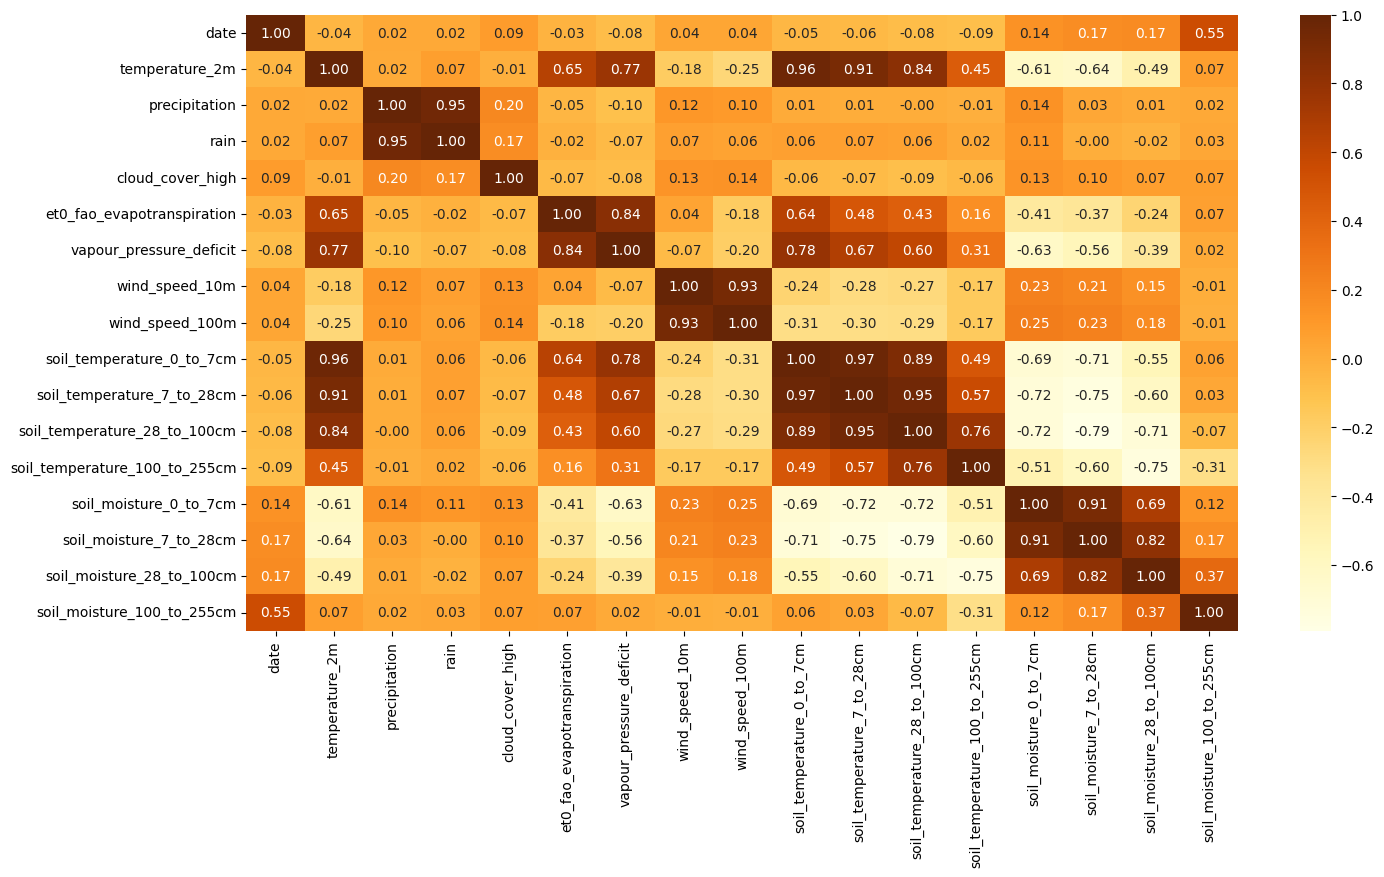

In [60]:
corr = meteo.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr', fmt='.2f')


Анализируя особенности роста сои, можно прийти к следующим выводам:

Признаки, которые мы исключим:

- Скорость ветра оказывает лишь косвенное влияние на рост сои, поскольку прямое воздействие возможно только при очень сильных порывах ветра.

- Температура почвенного горизонта на глубинах 0–7 см, 7–28 см и 28–100 см имеет прямую связь с температурой воздуха, так как почва быстро нагревается при повышении температуры окружающей среды. Однако основное всасывание питательных веществ происходит в средней части корня растения, тогда как главный корень сои может достигать глубины до двух метров. Поэтому мы сохраним данные только о температуре почвы на глубине 100–255 см.

- Аналогично, влажность почвенного горизонта на различных уровнях, за исключением слоя 100–255 см, также имеет важное значение. Поскольку основной корень сои проникает глубоко в почву, показатели влажности на меньших глубинах будут менее значимыми.

- Стандартизированный показатель потенциальной эвапотранспирации (ET0) используется для оценки потребности растений в воде и планирования орошения. Однако, учитывая, что соя выращивается без искусственного полива и её рост полностью зависит от природных ресурсов, расчет значения ET0 не является необходимым для нашего анализа.

- VPD характеризует степень насыщенности воздуха водяным паром относительно максимального уровня насыщения при данной температуре. Учитывая сильную корреляцию между VPD и температурой, включение обоих параметров в анализ привело бы к избыточности данных. Так как температура уже отражает условия, влияющие на рост сои, исключение VPD позволит избежать дублирования информации и сохранить акцент на ключевых факторах, непосредственно связанных с ростом сои


Извлечение нового признака:

- При изучении факторов, влияющих на рост и урожайность сои, мы проанализировали ряд научных публикаций. Особое внимание уделили [исследованию влияния погодно-климатических условий на содержание белка и масла в семенах сои на территории Северного Кавказа](#https://sites.icgbio.ru/vogis/download/14_Novikova.pdf?ysclid=m3u6jtf72349185423). Основываясь на результатах этой работы, мы решили включить в анализ новый показатель — гидротермический коэффициент (ГТК), который представляет собой отношение количества осадков к температуре. Как отмечено авторами исследования, именно этот параметр стал ключевым при проведении регрессионного анализа динамики урожайности.







In [61]:
meteo.drop(['precipitation', 
                 'wind_speed_10m', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
                 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
                 'soil_moisture_28_to_100cm', 'et0_fao_evapotranspiration', 'wind_speed_100m'], axis=1, inplace=True)

Разделим статистику на несколько сезонов:

1. Прорастание: (1 мая - 14 мая)
2. Всходы: (15 мая - 28 мая)
3. Вегетационная фаза: (29 мая - 11 июня)
4. Цветение: (12 июня - 25 июня)
5. Формирование бобов: (26 июня - 9 июля)
6. Созревание: (10 июля - 23 июля)
7. Уборка урожая: (24 июля - 9 сентября)

Это важное условие, в связи с тем, что соя требует разной температуры/влаги/дождей в разные периоды созревания.

Включим следующие показатели для дальнейшего анализа:

- Средние, минимальные и максимальные температуры в каждом сезоне позволят нам оценить, насколько экстремальными или стабильными были температурные условия в тот или иной период. Температура играет ключевую роль в росте сои, поэтому необходимо учитывать не только средние значения, но и крайние показатели. Это позволит выявить потенциально критические моменты на различных этапах развития растения.

- Температура и влажность почвенного горизонта на глубине 100-255 см помогут оценить, насколько благоприятны почвенные условия на разных стадиях роста сои. Этот показатель важен, потому что корни сои проникают глубоко в почву, и именно на такой глубине растение получает основную часть питательных веществ и влаги, необходимых для полноценного развития.

- Средний показатель ГТК по сезону, о нем мы говорили ранее

- Высокая облачность поможет определить периоды, когда солнце скрыто за облаками и соя испытывает недостаток солнечного света.


In [62]:

# если столбец с датой содержит информацию о часовом поясе, удалим её
if meteo['date'].dtype == 'datetime64[ns, UTC]':
    meteo['date'] = meteo['date'].dt.tz_localize(None) 

# укажем сезоны (шаблон для одного года)
seasons = {
    'Prorastanie': ('05-01', '05-14'),
    'Vsody': ('05-15', '05-28'),
    'Veg_faza': ('05-29', '06-11'),
    'Cvetenie': ('06-12', '06-25'),
    'Form_bobov': ('06-26', '07-09'),
    'Sozrevanie': ('07-10', '07-23'),
    'Ubor_urozhaya': ('07-24', '09-20')
}

result = pd.DataFrame()

# пройдемся по каждому году в данных
for year in meteo['date'].dt.year.unique():
    year_data = meteo[meteo['date'].dt.year == year]
    year_stats = {}
    year_stats['year'] = year
    
    # пройдем по каждому сезону
    for season_name, (start, end) in seasons.items():
        # формируем диапазон дат для текущего года
        start_date = pd.to_datetime(f"{year}-{start}").tz_localize(None)  # убираем часовой пояс
        end_date = pd.to_datetime(f"{year}-{end}").tz_localize(None)  # убираем часовой пояс
        
        # фильтруем данные для текущего сезона
        season_data = year_data[(year_data['date'] >= start_date) & (year_data['date'] <= end_date)]
        
        # усли данных нет, пропускаем сезон
        if season_data.empty:
            continue

        # рассчитываем показатели
        year_stats[f'avg_day_temp_{season_name}'] = season_data['temperature_2m'].mean()
        year_stats[f'min_day_temp_{season_name}'] = season_data['temperature_2m'].min()
        year_stats[f'max_day_temp_{season_name}'] = season_data['temperature_2m'].max()
        year_stats[f'avg_soil_moisture_100_to_255cm_{season_name}'] = season_data['soil_moisture_100_to_255cm'].mean()
        year_stats[f'sum_rain_{season_name}'] = season_data['rain'].sum()
        year_stats[f'avg_temperature_soil_{season_name}'] = season_data['soil_temperature_100_to_255cm'].mean()
        year_stats[f'avg_cloud_cover_high_{season_name}'] = season_data['cloud_cover_high'].sum()

        # рассчитаем ГТК
        sum_of_temperatures_above_10 = season_data.query("temperature_2m > 10")["temperature_2m"].sum()
        total_precipitation = season_data['rain'].sum()
        gtd = total_precipitation / (0.1 * sum_of_temperatures_above_10)
        year_stats[f'gtd_{season_name}'] = gtd


    result = pd.concat([result, pd.DataFrame([year_stats])], ignore_index=True)

result = pd.DataFrame(result)
result


,year,avg_day_temp_Prorastanie,min_day_temp_Prorastanie,max_day_temp_Prorastanie,avg_soil_moisture_100_to_255cm_Prorastanie,sum_rain_Prorastanie,avg_temperature_soil_Prorastanie,avg_cloud_cover_high_Prorastanie,gtd_Prorastanie,avg_day_temp_Vsody,min_day_temp_Vsody,max_day_temp_Vsody,avg_soil_moisture_100_to_255cm_Vsody,sum_rain_Vsody,avg_temperature_soil_Vsody,avg_cloud_cover_high_Vsody,gtd_Vsody,avg_day_temp_Veg_faza,min_day_temp_Veg_faza,max_day_temp_Veg_faza,avg_soil_moisture_100_to_255cm_Veg_faza,sum_rain_Veg_faza,avg_temperature_soil_Veg_faza,avg_cloud_cover_high_Veg_faza,gtd_Veg_faza,avg_day_temp_Cvetenie,min_day_temp_Cvetenie,max_day_temp_Cvetenie,avg_soil_moisture_100_to_255cm_Cvetenie,sum_rain_Cvetenie,avg_temperature_soil_Cvetenie,avg_cloud_cover_high_Cvetenie,gtd_Cvetenie,avg_day_temp_Form_bobov,min_day_temp_Form_bobov,max_day_temp_Form_bobov,avg_soil_moisture_100_to_255cm_Form_bobov,sum_rain_Form_bobov,avg_temperature_soil_Form_bobov,avg_cloud_cover_high_Form_bobov,gtd_Form_bobov,avg_day_temp_Sozrevanie,min_day_temp_Sozrevanie,max_day_temp_Sozrevanie,avg_soil_moisture_100_to_255cm_Sozrevanie,sum_rain_Sozrevanie,avg_temperature_soil_Sozrevanie,avg_cloud_cover_high_Sozrevanie,gtd_Sozrevanie,avg_day_temp_Ubor_urozhaya,min_day_temp_Ubor_urozhaya,max_day_temp_Ubor_urozhaya,avg_soil_moisture_100_to_255cm_Ubor_urozhaya,sum_rain_Ubor_urozhaya,avg_temperature_soil_Ubor_urozhaya,avg_cloud_cover_high_Ubor_urozhaya,gtd_Ubor_urozhaya
0,2015,13.138658,5.3,20.0,0.290658,22.6,3.567093,12455,0.067655,16.515335,5.7,29.1,0.290812,6.5,5.174441,5904,0.013776,19.401917,9.9,29.3,0.289300,17.9,7.057827,8161,0.029524,22.134185,12.3,30.7,0.286565,24.6,9.047923,9169,0.035508,21.595527,12.3,31.3,0.284029,27.8,11.066454,8019,0.041128,18.249840,11.4,30.0,0.281770,46.4,12.721406,10331,0.081230,19.362168,8.2,32.9,0.275742,18.3,15.545226,28939,0.006868
1,2016,13.591693,3.7,23.3,0.329380,17.8,4.793291,6176,0.049618,14.440895,7.7,23.2,0.334291,53.8,6.324601,11520,0.122479,15.589776,5.4,26.4,0.337687,15.6,7.949521,9579,0.034025,21.238019,10.3,30.1,0.337208,14.8,9.448243,12034,0.022264,22.245687,13.2,30.0,0.334406,1.7,11.364537,6943,0.002442,24.915016,13.9,35.5,0.329847,9.0,13.188818,7389,0.011541,20.101364,8.0,32.6,0.319661,77.8,16.677459,34217,0.028275
2,2017,12.376997,-0.3,24.7,0.350853,16.4,3.969010,7590,0.052334,13.256230,1.3,23.1,0.348712,14.1,5.543770,7897,0.039043,15.750799,3.7,24.6,0.345070,30.2,7.168690,9532,0.065254,16.598403,8.8,24.8,0.341102,23.0,8.873482,7233,0.044937,20.273482,9.9,30.4,0.335958,22.8,10.603834,9689,0.035987,20.730032,12.2,29.6,0.333157,15.4,12.400958,10995,0.023734,20.121823,9.1,34.6,0.322632,87.4,16.301866,32393,0.031321
3,2019,13.782428,2.4,23.1,0.337000,58.6,3.468371,15681,0.150635,16.472843,8.2,23.7,0.335824,29.8,5.286262,14174,0.058939,20.582748,12.4,27.7,0.333840,15.0,7.305112,10336,0.023283,22.109265,12.3,31.0,0.330594,9.8,9.427476,7359,0.014161,17.610863,10.0,28.6,0.327291,39.1,11.372204,11082,0.071062,17.121406,9.6,26.8,0.325070,31.2,12.543131,10271,0.058430,18.192247,6.4,29.8,0.318362,56.5,14.731443,45653,0.022746
4,2020,12.373163,3.3,21.7,0.312879,51.6,4.763259,14279,0.169064,9.612780,2.1,16.7,0.311757,37.3,5.827796,9709,0.213766,16.912460,7.3,28.4,0.310891,63.8,6.760703,14906,0.124257,22.031629,11.6,30.3,0.309185,23.3,8.505431,11434,0.033788,22.300000,14.7,31.8,0.305939,23.3,10.629073,8938,0.033382,18.065495,9.6,28.2,0.303016,57.8,12.413099,6716,0.102393,18.276095,6.1,30.8,0.298314,58.8,14.854989,40882,0.023602
5,2021,11.126518,3.0,20.1,0.313358,38.8,3.623962,13491,0.153524,16.161981,6.1,28.0,0.312278,26.2,4.958147,12429,0.054088,14.575719,4.7,23.2,0.310636,42.1,6.606070,14228,0.099936,22.248243,12.2,33.9,0.308383,14.5,8.167093,9089,0.020822,22.438339,14.5,33.4,0.304335,21.0,10.244409,7296,0.029901,24.087540,13.6,31.1,0.300435,30.6,12.282428,7602,0.040587,18.928930,2.9,32.9,0.292525,98.5,15.815578,46095,0.039208
6,2022,10.307987,1.0,23.4,0.385188,6.0,3.306390,8895,0.027634,11.013738,3.0,19.2,0.383524,60.6,4.6

In [22]:
result.to_csv('res_meteo.csv')